# HackerEarth Deep Learning Challenge - Friends Goals


#### In this challenge we were given a test dataset and we had to predict whether the group of people are Adults, Teenagers or Toddler

#### I have used MTCNN to detect the faces from the images and trained a classifier to classify individual faces as Adult, Teenager or Toddler. I implemented 2 statergies to identify the group type.
1. Sum the probabilties of all classes for all faces in the image, predict the class with highest sum
2. Calculate probability of all classes for all individual faces in the image, then predict the class with lowest age

## Importing necessary Files

In [1]:
import tensorflow as tf
import tarfile
import urllib
import os
import numpy as np


from mtcnn.mtcnn import MTCNN
from numpy import asarray
from PIL import Image

from matplotlib import pyplot as plt
%matplotlib inline
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

## Matplotlib to see the test image

In [2]:
def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

In [3]:
extracted_face=extract_face_from_image("C:/Users/PRATIK/Documents/Projects/Dataset/Test_Data/Img1001.jpg")

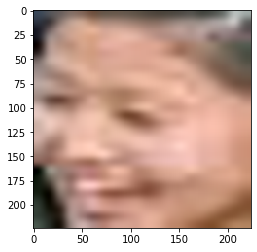

In [4]:
plt.imshow(extracted_face[0])
plt.show()

In [5]:
train_dir="C:/Users/PRATIK/Documents/Projects/Dataset/Train_Data/"

## Building Model

In [6]:
resnet2=tf.keras.applications.ResNet101V2(weights="imagenet", include_top=False, input_shape=(224,224,3),pooling="avg")
resnet2.trainable=False

In [7]:
def create_model():
    model = tf.keras.models.Sequential([
        resnet2,
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.Recall()])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 2048)              42626560  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 6147      
Total params: 42,632,707
Trainable params: 6,147
Non-trainable params: 42,626,560
_________________________________________________________________


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 60,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)

In [9]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode="categorical",
                                                    batch_size = 8,
                                                    seed=42,
                                                    target_size = (224, 224),
                                                    shuffle=True) 

Found 5496 images belonging to 3 classes.


In [10]:
vaild_dir="C:/Users/PRATIK/Documents/Projects/Dataset/Valid_Data/"

In [11]:
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [12]:
validation_generator = test_datagen.flow_from_directory(vaild_dir,
                                                    class_mode="categorical",
                                                    batch_size = 8,
                                                    seed=42,
                                                    target_size = (224, 224),
                                                    shuffle=True) 

Found 600 images belonging to 3 classes.


In [13]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 5496//8,
            validation_steps = 600//8,
            epochs =10,
            verbose = 1)

Epoch 1/10
687/687 [==============================] - 69s 101ms/step - loss: 1.2424 - recall: 0.3983 - val_loss: 0.5694 - val_recall: 0.6617
Epoch 2/10
687/687 [==============================] - 65s 94ms/step - loss: 0.8298 - recall: 0.5862 - val_loss: 0.5058 - val_recall: 0.7500
Epoch 3/10
687/687 [==============================] - 65s 95ms/step - loss: 0.7294 - recall: 0.6358 - val_loss: 0.4853 - val_recall: 0.7733
Epoch 4/10
687/687 [==============================] - 66s 96ms/step - loss: 0.6772 - recall: 0.6727 - val_loss: 0.4750 - val_recall: 0.7700
Epoch 5/10
687/687 [==============================] - 66s 96ms/step - loss: 0.6461 - recall: 0.6848 - val_loss: 0.4654 - val_recall: 0.7883
Epoch 6/10
687/687 [==============================] - 66s 96ms/step - loss: 0.6292 - recall: 0.7065 - val_loss: 0.4633 - val_recall: 0.7900
Epoch 7/10
687/687 [==============================] - 67s 97ms/step - loss: 0.6135 - recall: 0.6965 - val_loss: 0.4599 - val_recall: 0.7867
Epoch 8/10
687/687 

In [14]:
model.save("stage5.h5")

In [15]:
model1= tf.keras.models.load_model("stage5.h5")

In [16]:
import pandas as pd

In [17]:
df=pd.read_csv("Test.csv")

In [18]:
df.head()

,Filename
0,Img1137.jpg
1,Img3633.jpg
2,Img1474.jpg
3,Img3459.jpg
4,Img5578.jpg


In [19]:
filename=df["Filename"][102]
filename

'Img1621.jpg'

In [20]:
base_dir="C:/Users/PRATIK/Documents/Projects/Dataset/Test_Data"

In [21]:
sample_dir=base_dir+"/"+filename

In [22]:
sample_dir

'C:/Users/PRATIK/Documents/Projects/Dataset/Test_Data/Img1621.jpg'

## Predicting on test images

In [23]:

def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []
    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        print(face['box'])
        x2, y2 = x1 + width, y1 + height
        x1=max(0,x1)
        y1=max(0,y1)
        #x2=min(x2,image.shape[0])
        #y2=min(y2,image.shape[1])
        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_array = face_array.astype('float32')
        # normalize to the range 0-1
        face_array /= 255.0

        face_array=face_array.reshape(1,224,224,3)
        face_images.append(face_array)

    return face_images
faces=extract_face_from_image(sample_dir)

[794, 8, 82, 108]
[84, 51, 86, 112]
[212, -10, 84, 94]
[925, -15, 80, 105]
[847, 252, 25, 35]


In [24]:
probs=[]

for face in faces:
    y_prob = model1.predict(face)
    probs.append(y_prob)
probsum=sum(probs)

label=np.argmax(probsum, axis=-1)
print(label)

[0]


In [25]:
label_map = (train_generator.class_indices)
label_map

{'Adults': 0, 'Teenagers': 1, 'Toddler': 2}

## Statergy 1

In [26]:
base_dir="C:/Users/PRATIK/Documents/Projects/Dataset/Test_Data"
index=0
d={'[0]':'Adults','[1]':'Teenagers','[2]':'Toddler'}
df["Category"]=""
for file in df["Filename"]:
    sample_dir=base_dir+"/"+file
    faces=extract_face_from_image(sample_dir)
    
    probs=[]
    for face in faces:
        y_prob = model1.predict(face)
        probs.append(y_prob)
    probsum=sum(probs)
    label=np.argmax(probsum, axis=-1)
    
    print(index)
    label=str(label)
    print(label)
    if label not in ['[0]','[1]','[2]']:
        label='[2]'
    pred=d[str(label)]
    df["Category"][index]=pred
    print(pred)
    index+=1
df.head()
    
    
    

[91, 28, 22, 30]
[162, 38, 21, 27]
0
[0]
Adults
[140, 46, 28, 32]
[71, 119, 27, 35]
1
[0]
Adults


[59, 46, 12, 16]
[197, 44, 10, 14]
[236, 36, 12, 13]
[106, 51, 9, 12]
2
[0]
Adults
[128, 73, 26, 34]
3
[0]
Adults
[284, 320, 23, 30]
[476, 182, 24, 26]
[363, 17, 45, 65]
[549, 269, 34, 44]
4
[2]
Toddler
[418, 247, 61, 76]
[605, 379, 64, 83]
[257, 237, 54, 76]
[860, 157, 55, 81]
[388, 563, 64, 74]
5
[1]
Teenagers


[63, 39, 15, 18]
[121, 43, 14, 18]
[93, 55, 15, 24]
[162, 55, 16, 25]
6
[0]
Adults
[119, 5, 37, 42]
[193, 4, 40, 46]
7
[2]
Toddler
[120, 29, 24, 27]
[199, 36, 26, 32]
[51, 32, 26, 31]
[283, 16, 25, 29]
8
[0]
Adults
[62, 21, 27, 40]
[189, 29, 27, 36]
[95, 62, 11, 15]
9
[0]
Adults


[99, 22, 12, 15]
[149, 24, 13, 16]
[190, 24, 10, 14]
[64, 36, 10, 13]
10
[0]
Adults
[518, 116, 69, 102]
[168, 103, 108, 147]
[346, 195, 80, 114]
[493, 196, 80, 115]
11
[1]
Teenagers
[931, 206, 56, 76]
[507, 235, 50, 60]
[1115, 166, 58, 71]
[281, 218, 61, 84]
[689, 269, 53, 68]
[168, 171, 58, 79]
12
[0]
Adults
[190, 178, 75, 94]
[444, 275, 73, 88]
[663, 178, 77, 102]
[1071, 286, 39, 49]
[874, 195, 67, 76]
13
[0]
Adults
14
0
Toddler


[135, 45, 41, 57]
15
[0]
Adults
[158, 34, 68, 81]
[25, 52, 73, 96]
[89, 46, 65, 87]
16
[0]
Adults
17
0
Toddler
[438, 184, 94, 136]
[250, 214, 108, 151]
[605, 213, 104, 138]
[755, 141, 138, 167]
18
[0]
Adults
[65, 41, 26, 33]
[138, 43, 24, 30]
[195, 42, 22, 31]
[96, 69, 33, 38]
19
[0]
Adults


[175, 120, 129, 166]
[498, 142, 112, 147]
[815, 73, 110, 143]
[331, 149, 122, 153]
[648, 72, 110, 144]
20
[1]
Teenagers
[191, 54, 11, 15]
[144, 39, 12, 16]
21
[0]
Adults
[101, 107, 11, 15]
[66, 51, 11, 14]
[154, 27, 14, 17]
[86, 51, 10, 11]
[45, 28, 13, 17]
22
[0]
Adults
[166, 60, 19, 25]
[210, 45, 19, 24]
[92, 80, 20, 24]
[136, 62, 15, 24]
23
[0]
Adults


[55, 86, 11, 13]
24
[0]
Adults
[392, 213, 37, 43]
[517, 221, 42, 55]
[90, 49, 40, 55]
25
[0]
Adults
[124, 630, 62, 76]
[616, 246, 92, 120]
[310, 288, 94, 119]
[827, 536, 60, 75]
[1124, 455, 73, 94]
26
[1]
Teenagers
[24, 67, 57, 55]
[103, 184, 46, 57]
[3, 133, 45, 47]
[101, 50, 41, 48]
27
[0]
Adults
[115, 49, 20, 27]
[69, 23, 21, 35]
[227, 10, 26, 29]
[199, 58, 17, 19]
28
[0]
Adults
[743, 182, 55, 67]
[164, 238, 56, 80]
[646, 129, 43, 56]
[273, 146, 51, 63]
[512, 144, 46, 61]
[390, 103, 46, 59]
29
[0]
Adults
[54, 62, 24, 34]
[222, 50, 24, 31]
[105, 43, 18, 24]
30
[0]
Adults


[152, 24, 25, 30]
[235, 30, 14, 19]
[186, 52, 15, 19]
31
[0]
Adults
[254, 171, 163, 199]
[395, 154, 171, 245]
[728, 223, 203, 239]
[596, 288, 162, 179]
32
[1]
Teenagers
[140, 39, 20, 28]
[178, 53, 29, 37]
[100, 42, 24, 34]
33
[0]
Adults


[14, 74, 14, 22]
[160, 47, 12, 14]
[223, 51, 15, 20]
34
[0]
Adults
[38, 36, 13, 17]
[133, 39, 14, 16]
[90, 56, 13, 15]
35
[0]
Adults
36
0
Toddler


37
0
Toddler
[51, 98, 23, 26]
[125, 151, 18, 23]
[36, 182, 22, 24]
38
[0]
Adults
[354, 212, 54, 70]
[250, 200, 56, 71]
[476, 207, 59, 75]
[609, 214, 58, 77]
[558, 131, 51, 77]
[781, 228, 51, 60]
[917, 204, 52, 71]
[126, 170, 57, 72]
[1081, 141, 56, 70]
[763, 208, 31, 38]
39
[0]
Adults
[743, 207, 154, 229]
[257, 238, 142, 200]
[469, 205, 140, 192]
40
[1]
Teenagers


[199, 56, 12, 17]
[71, 22, 12, 16]
[151, 41, 12, 15]
41
[0]
Adults
[97, 10, 16, 20]
[1, 5, 16, 21]
[47, 15, 17, 22]
[205, 17, 16, 23]
[129, 34, 20, 27]
42
[0]
Adults
[203, 37, 13, 15]
[191, 47, 7, 11]
43
[0]
Adults


[115, 64, 23, 29]
44
[0]
Adults
[607, 276, 29, 43]
[386, 272, 32, 57]
[614, 282, 33, 45]
[738, 285, 36, 48]
45
[0]
Adults
[34, 64, 19, 26]
[75, 41, 19, 25]
[110, 75, 17, 22]
[167, 61, 9, 13]
46
[0]
Adults
[121, 36, 35, 48]
[59, 47, 39, 57]
47
[0]
Adults


[166, 133, 31, 43]
[318, 153, 30, 43]
[98, 140, 22, 40]
[391, 138, 32, 39]
48
[0]
Adults
[202, 195, 27, 32]
[243, 185, 19, 30]
[160, 208, 30, 47]
49
[0]
Adults
[103, 32, 42, 54]
[192, 33, 39, 58]
[23, 50, 43, 59]
50
[0]
Adults
[215, 58, 50, 62]
[127, 86, 42, 57]
[112, 24, 35, 49]
[168, 66, 38, 50]
[61, 64, 52, 71]
[9, 14, 67, 72]
51
[0]
Adults


52
0
Toddler
[330, 255, 111, 153]
[96, 188, 101, 146]
[712, 160, 128, 172]
[567, 154, 124, 126]
[944, 163, 134, 172]
53
[1]
Teenagers
[67, 52, 23, 31]
[20, 40, 20, 28]
[147, 35, 24, 32]
[195, 33, 24, 33]
[118, 33, 21, 22]
54
[0]
Adults
[73, 52, 41, 53]
[165, 60, 35, 49]
55
[0]
Adults


[128, 20, 28, 38]
[12, 38, 31, 41]
[59, 37, 25, 37]
56
[0]
Adults
[115, 47, 16, 22]
[205, 25, 18, 24]
[147, 41, 18, 23]
[178, 53, 15, 18]
57
[0]
Adults
[172, 44, 47, 62]
[14, 75, 19, 26]
[132, 43, 28, 37]
[103, 56, 23, 30]
[58, 68, 18, 24]
58
[0]
Adults
[20, 26, 35, 44]
[134, 63, 29, 37]
59
[0]
Adults
[248, 103, 167, 223]
[502, 80, 176, 197]
[742, 90, 164, 236]
60
[0]
Adults


[105, 19, 31, 44]
[43, 29, 32, 51]
[187, 28, 30, 41]
61
[0]
Adults
[82, 60, 47, 59]
[208, 61, 20, 26]
[127, 71, 26, 34]
[161, 69, 19, 25]
62
[0]
Adults
[292, 93, 69, 102]
[669, 65, 71, 102]
[511, 79, 65, 89]
63
[0]
Adults
[166, 52, 20, 26]
[171, 79, 25, 32]
[85, 63, 18, 24]
[125, 87, 21, 27]
[128, 64, 18, 20]
64
[0]
Adults
[523, 173, 42, 54]
[352, 93, 75, 101]
[127, 31, 88, 137]
[462, 102, 61, 80]
65
[0]
Adults


66
0
Toddler
[15, 43, 25, 32]
[113, 54, 16, 20]
[183, 54, 16, 21]
[81, 56, 18, 27]
67
[0]
Adults
[83, 62, 22, 27]
[203, 97, 21, 28]
[161, 50, 20, 23]
[106, 49, 17, 21]
68
[0]
Adults
69
0
Toddler


70
0
Toddler
[92, 191, 28, 37]
[33, 175, 27, 45]
[167, 181, 23, 31]
[239, 178, 27, 33]
71
[0]
Adults
[107, 7, 24, 36]
[135, 15, 20, 27]
72
[0]
Adults


[91, 30, 19, 29]
[206, 19, 20, 32]
[159, 26, 17, 25]
73
[0]
Adults
[656, 206, 149, 198]
[511, 276, 122, 155]
[67, 370, 104, 134]
[857, 216, 224, 303]
[286, 334, 103, 135]
74
[1]
Teenagers
[49, 58, 33, 42]
[148, 57, 31, 40]
[115, 29, 32, 40]
[206, 41, 28, 44]
75
[0]
Adults
[78, 42, 15, 19]
[37, 44, 14, 20]
[133, 37, 14, 19]
[188, 66, 23, 26]
76
[0]
Adults
[71, 60, 20, 31]
[106, 37, 19, 24]
[183, 76, 23, 32]
[160, 27, 21, 25]
[197, 26, 19, 28]
77
[0]
Adults


[137, 38, 12, 16]
[44, 64, 14, 18]
[104, 27, 12, 15]
[201, 49, 13, 15]
[173, 35, 10, 14]
[73, 41, 12, 14]
78
[0]
Adults
[367, 148, 63, 90]
[445, 66, 95, 99]
[195, 57, 73, 111]
79
[0]
Adults
[32, 56, 28, 36]
[141, 68, 23, 32]
[65, 69, 23, 32]
[93, 59, 28, 34]
[188, 69, 26, 35]
[164, 58, 25, 33]
80
[0]
Adults
[533, 352, 64, 85]
[637, 65, 75, 92]
[666, 305, 102, 158]
81
[1]
Teenagers
[487, 261, 24, 30]
[645, 322, 20, 29]
[563, 249, 21, 29]
[438, 327, 20, 25]
[689, 302, 20, 26]
82
[0]
Adults
[199, 27, 18, 29]
83
[0]
Adults


[110, 27, 11, 15]
[147, 22, 12, 14]
84
[0]
Adults
[712, 67, 157, 214]
[348, 105, 164, 230]
[949, 101, 21, 27]
85
[1]
Teenagers
[137, 49, 27, 32]
[77, 58, 20, 25]
[180, 53, 17, 27]
86
[0]
Adults
87
0
Toddler


[58, 61, 14, 17]
[154, 36, 15, 19]
[199, 36, 11, 15]
[109, 59, 12, 17]
[240, 33, 10, 16]
88
[0]
Adults
[48, 61, 85, 110]
[321, 129, 76, 112]
89
[1]
Teenagers
[564, 422, 62, 88]
[335, 476, 72, 87]
[796, 363, 63, 83]
[134, 438, 77, 101]
[1127, 359, 58, 77]
[841, 396, 48, 68]
90
[0]
Adults
[558, 166, 93, 115]
[401, 118, 94, 118]
91
[1]
Teenagers
[218, 12, 20, 28]
[95, 22, 21, 25]
[145, 34, 23, 29]
[247, 12, 22, 27]
[42, 31, 18, 25]
92
[0]
Adults


[107, 72, 12, 15]
[134, 62, 19, 29]
[128, 14, 13, 16]
93
[0]
Adults
[205, 35, 26, 35]
[115, 30, 23, 34]
[25, 30, 25, 38]
[184, 33, 22, 29]
94
[0]
Adults
[174, 45, 37, 49]
[85, 62, 37, 47]
[39, 30, 32, 40]
95
[0]
Adults
[233, 165, 28, 39]
[390, 180, 20, 29]
[405, 185, 34, 47]
96
[0]
Adults


[533, 166, 136, 187]
[1124, 181, 144, 188]
[175, 97, 145, 201]
97
[0]
Adults
[162, 53, 45, 54]
[115, 51, 38, 53]
[42, 44, 44, 59]
98
[0]
Adults
99
0
Toddler
[133, 18, 26, 36]
[95, 88, 29, 37]
[85, 180, 27, 34]
[44, 232, 33, 34]
100
[0]
Adults


[653, 200, 73, 95]
[305, 158, 266, 385]
[38, 290, 88, 108]
[937, 198, 77, 91]
101
[1]
Teenagers
[794, 8, 82, 108]
[84, 51, 86, 112]
[212, -10, 84, 94]
[925, -15, 80, 105]
[847, 252, 25, 35]
102
[0]
Adults
[589, 218, 55, 71]
[767, 180, 53, 72]
[969, 293, 46, 60]
[383, 335, 49, 59]
103
[1]
Teenagers
[90, 25, 13, 18]
[121, 32, 12, 16]
[163, 22, 14, 20]
104
[0]
Adults
[102, 63, 20, 28]
[38, 36, 21, 25]
105
[0]
Adults
[623, 341, 82, 104]
[918, 462, 54, 71]
[266, 267, 71, 125]
[814, 433, 66, 82]
[570, 326, 100, 127]
[103, 159, 27, 33]
106
[0]
Adults
[197, 330, 77, 119]
[743, 329, 92, 115]
[851, 369, 104, 107]
[459, 308, 92, 119]
[955, 143, 43, 60]
[525, 239, 50, 60]


107
[0]
Adults
[133, 230, 123, 157]
[595, 283, 105, 148]
[792, 291, 114, 157]
[403, 247, 119, 154]
[698, 249, 110, 142]
[275, 293, 107, 140]
108
[1]
Teenagers
[111, 84, 46, 59]
[267, 95, 47, 61]
[477, 134, 57, 78]
[371, 107, 44, 56]
[426, 99, 51, 65]
[166, 60, 40, 49]
109
[0]
Adults
[82, 114, 15, 21]
[118, 109, 14, 20]
[100, 104, 16, 20]
110
[0]
Adults
111
0
Toddler
[242, 80, 9, 12]
[97, 69, 8, 10]
112
[0]
Adults


[122, 57, 20, 26]
[118, 103, 29, 33]
[155, 63, 19, 24]
[42, 94, 26, 32]
[75, -4, 17, 20]
113
[0]
Adults
[75, 61, 13, 18]
[146, 69, 12, 19]
[179, 63, 14, 17]
[42, 61, 13, 21]
114
[0]
Adults
[104, 61, 45, 57]
[183, 63, 47, 61]
[3, 63, 47, 61]
[58, 20, 42, 53]
115
[0]
Adults
[30, 51, 39, 52]
[188, 23, 41, 57]
[70, 11, 34, 49]
[93, 102, 47, 58]
[141, -9, 42, 47]
[116, 32, 34, 45]
116
[0]
Adults


[11, 33, 18, 24]
[163, 59, 20, 27]
[65, 22, 23, 29]
[225, 22, 23, 28]
117
[0]
Adults
[198, 75, 9, 13]
118
[0]
Adults
[75, 17, 24, 32]
[105, 20, 28, 31]
[150, 19, 27, 29]
119
[0]
Adults


[199, 40, 22, 28]
[82, 20, 23, 31]
[47, 25, 20, 28]
[158, 33, 20, 29]
120
[0]
Adults
[398, 134, 59, 74]
[189, 143, 55, 70]
121
[0]
Adults
[181, 39, 28, 39]
[120, 27, 35, 44]
[240, 26, 37, 55]
122
[0]
Adults
123
0
Toddler


[202, 49, 16, 23]
[127, 63, 16, 23]
[50, 54, 15, 24]
124
[0]
Adults
[66, 52, 22, 29]
[145, 33, 23, 31]
[20, 40, 18, 25]
[191, 34, 24, 32]
[116, 33, 21, 23]
125
[0]
Adults
[644, 265, 99, 125]
[1058, 327, 127, 145]
[807, 277, 105, 132]
[165, 216, 103, 133]
[407, 368, 80, 109]
126
[0]
Adults
[52, 40, 20, 25]
[124, 46, 22, 27]
[224, 63, 25, 33]
[77, 27, 18, 22]
[200, 45, 22, 30]
[174, 49, 19, 26]
127
[0]
Adults
[37, 19, 26, 35]
[105, 12, 26, 33]
[153, 24, 18, 23]
[183, 27, 20, 25]
128
[0]
Adults


[41, 18, 20, 28]
[161, 26, 9, 11]
129
[0]
Adults
130
0
Toddler


[116, 28, 13, 16]
[44, 63, 10, 13]
[219, 26, 11, 15]
[77, 63, 10, 12]
[162, 36, 13, 16]
131
[0]
Adults
[815, 300, 95, 123]
[317, 306, 98, 140]
[805, 77, 88, 118]
[404, 82, 102, 117]
132
[0]
Adults
[125, 94, 10, 15]
133
[0]
Adults
[857, 160, 212, 281]
[256, 66, 170, 233]
[457, 597, 114, 150]
134
[1]
Teenagers
[105, 39, 16, 23]
[140, 33, 17, 24]
135
[0]
Adults


136
0
Toddler
[218, 62, 26, 31]
137
[2]
Toddler
[103, 99, 24, 34]
[154, 40, 23, 31]
[186, 52, 23, 33]
138
[0]
Adults


[257, 444, 273, 335]
[1016, 548, 199, 244]
[581, 323, 223, 282]
139
[1]
Teenagers
[45, 72, 11, 15]
140
[0]
Adults
141
0
Toddler


[55, 74, 24, 28]
[134, 67, 22, 31]
[104, 55, 25, 33]
142
[0]
Adults
143
0
Toddler
[78, 11, 14, 19]
[50, 107, 16, 20]
[56, 54, 15, 21]
[26, 139, 17, 19]
144
[0]
Adults


145
0
Toddler
[149, 33, 18, 26]
[120, 81, 18, 25]
[146, 65, 19, 27]
[125, 45, 18, 25]
146
[0]
Adults
[65, 59, 28, 35]
[123, 55, 26, 33]
[173, 48, 28, 34]
147
[0]
Adults
[299, 113, 50, 69]
[130, 72, 55, 77]
[501, 99, 47, 62]
[640, 131, 53, 65]
[795, 126, 65, 69]
148
[0]
Adults
149
0
Toddler


[123, 71, 20, 25]
[56, 58, 14, 23]
[175, 94, 12, 16]
[135, 73, 16, 18]
[195, 98, 13, 16]
150
[0]
Adults
[198, 28, 25, 36]
[110, 13, 28, 40]
[264, 11, 26, 34]
[1, -12, 34, 39]
151
[0]
Adults
[48, 47, 18, 23]
[196, 12, 14, 23]
[137, 39, 14, 18]
152
[0]
Adults
[70, 55, 34, 48]
[25, 71, 33, 45]
153
[0]
Adults


[104, 81, 29, 38]
[138, 24, 21, 26]
[95, 26, 22, 24]
[16, 63, 25, 30]
[197, 4, 22, 33]
[74, -1, 21, 22]
154
[0]
Adults
[670, 230, 39, 53]
[435, 184, 39, 51]
[253, 302, 38, 48]
[832, 178, 44, 58]
[521, 264, 32, 48]
155
[0]
Adults
[208, 72, 18, 23]
[164, 70, 19, 27]
[82, 62, 16, 23]
[103, 93, 17, 21]
[130, 83, 14, 19]
156
[0]
Adults
[511, 290, 240, 306]
[895, 311, 247, 314]
[295, 98, 212, 279]
[18, 319, 243, 302]
157
[1]
Teenagers
[1127, 355, 63, 100]
[825, 398, 72, 95]
[610, 356, 63, 88]
[303, 429, 62, 96]
158
[0]
Adults
[1039, 334, 163, 226]
[1290, 349, 183, 222]
[756, 220, 174, 238]
[518, 217, 189, 246]
159
[1]
Teenagers


[85, 42, 17, 22]
[58, 37, 16, 20]
[219, 31, 11, 15]
160
[0]
Adults
[642, 50, 160, 229]
[821, 92, 127, 171]
[424, 219, 199, 258]
161
[1]
Teenagers
[121, 84, 35, 49]
[160, 105, 40, 49]
[80, 82, 37, 51]
[267, 99, 40, 50]
[28, 72, 33, 40]
162
[0]
Adults
[558, 184, 36, 49]
[452, 231, 38, 49]
[782, 274, 33, 43]
163
[0]
Adults
[195, 55, 18, 20]
164
[0]
Adults


[78, 22, 29, 38]
[222, 7, 25, 38]
[1, 11, 36, 50]
165
[0]
Adults
[119, 22, 16, 20]
[7, 72, 16, 17]
166
[0]
Adults


[75, 55, 21, 29]
[38, 16, 22, 28]
[137, 69, 17, 27]
[167, 51, 30, 43]
167
[0]
Adults
[70, 62, 12, 13]
168
[0]
Adults
[652, 495, 102, 142]
169
[1]
Teenagers
[1101, 186, 88, 108]
[165, 104, 78, 108]
[824, 143, 73, 90]
[1015, 141, 78, 94]
[637, 53, 71, 93]
[283, 122, 64, 92]
[453, 118, 68, 90]
170
[1]
Teenagers
[182, 44, 30, 41]
[65, 58, 27, 35]
[171, 83, 18, 20]
171
[0]
Adults


172
0
Toddler
[185, 30, 23, 30]
[30, 16, 22, 30]
[88, 28, 21, 29]
[114, 40, 27, 30]
173
[0]
Adults
[21, 120, 29, 41]
[262, 78, 20, 24]
[363, 83, 26, 35]
[175, 74, 17, 20]
[107, 66, 15, 20]
174
[0]
Adults
[102, 243, 218, 303]
[943, 155, 214, 296]
[512, 158, 220, 295]
175
[1]
Teenagers


[129, 63, 22, 29]
[108, 11, 19, 24]
[46, 26, 18, 27]
[29, 76, 27, 33]
[88, 65, 26, 30]
176
[0]
Adults
[58, 21, 15, 21]
[212, 48, 13, 15]
[251, 65, 12, 14]
[170, 37, 13, 17]
[120, 39, 15, 21]
177
[0]
Adults
[79, 48, 16, 20]
[132, 39, 18, 24]
[179, 45, 20, 25]
178
[0]
Adults


[221, 29, 31, 38]
[108, 48, 37, 45]
[29, 30, 30, 37]
[147, 50, 29, 33]
[179, 42, 32, 35]
179
[0]
Adults
[579, 159, 103, 142]
[153, 150, 104, 136]
[742, 209, 100, 130]
[333, 213, 97, 129]
180
[2]
Toddler
[157, -2, 23, 32]
[15, 24, 26, 45]
[79, 6, 23, 32]
[205, 52, 29, 43]
[140, 64, 23, 33]
[50, 59, 26, 27]
181
[0]
Adults
[113, 62, 60, 80]
[60, 59, 50, 59]
[0, 64, 41, 49]
182
[0]
Adults
[142, 49, 12, 18]
[187, 44, 14, 21]
[230, 50, 13, 20]
183
[0]
Adults


[334, 266, 42, 53]
[435, 206, 31, 40]
[520, 188, 34, 45]
[392, 212, 26, 34]
[310, 196, 30, 37]
184
[0]
Adults
[42, 51, 15, 19]
[128, 54, 20, 25]
[184, 40, 20, 27]
[84, 49, 14, 19]
185
[2]
Toddler
[215, 55, 16, 21]
[126, 47, 14, 17]
[36, 50, 13, 16]
186
[0]
Adults
187
0
Toddler


[56, 126, 41, 48]
[14, 168, 64, 74]
[86, 87, 35, 41]
188
[0]
Adults
[160, 52, 21, 29]
[189, 22, 20, 26]
[54, 42, 16, 21]
[111, 43, 17, 24]
[95, 40, 13, 17]
[230, 40, 15, 19]
189
[0]
Adults
[67, 104, 35, 38]
[142, 74, 38, 52]
[91, 79, 20, 27]
[60, 62, 24, 30]
[86, 36, 21, 27]
[109, 32, 20, 29]
[117, 65, 23, 28]
190
[0]
Adults
[65, 101, 13, 15]
[113, 89, 13, 17]
[143, 95, 17, 19]
191
[0]
Adults
[188, 7, 10, 12]
192
[0]
Adults


[139, 34, 24, 31]
[207, 27, 26, 31]
[66, 28, 26, 34]
[-5, -1, 29, 48]
193
[0]
Adults
[169, 46, 39, 47]
[85, 66, 12, 17]
194
[0]
Adults
[533, 107, 104, 143]
[315, 320, 125, 161]
[1026, 348, 103, 156]
[693, 223, 92, 128]
[375, 212, 91, 114]
195
[1]
Teenagers
[82, 42, 16, 20]
[102, 48, 15, 18]
[154, 51, 13, 17]
[219, 63, 12, 15]
196
[0]
Adults
[107, 39, 15, 19]
[127, 28, 14, 21]
[124, 56, 16, 22]
[102, 69, 15, 20]
197
[0]
Adults


[170, 33, 16, 21]
[101, 39, 16, 21]
[44, 24, 17, 25]
[269, 43, 21, 21]
[217, 44, 18, 21]
198
[0]
Adults
[128, 52, 20, 29]
[158, 25, 29, 31]
[68, 22, 24, 34]
199
[0]
Adults
[192, 68, 24, 32]
[40, 60, 25, 29]
[156, 72, 19, 29]
[140, 34, 24, 25]
200
[0]
Adults
[181, 24, 31, 41]
[143, 84, 29, 33]
201
[0]
Adults


[262, 413, 209, 259]
[730, 287, 176, 221]
[1094, 379, 129, 176]
202
[1]
Teenagers
[73, 75, 29, 37]
[126, 27, 23, 30]
[163, 53, 21, 28]
[240, 84, 23, 32]
[87, 51, 23, 30]
203
[0]
Adults
[648, 45, 35, 45]
[417, 294, 42, 53]
[1180, 435, 58, 65]
[595, 239, 39, 53]
[1030, 340, 46, 59]
[751, 275, 33, 44]
[922, 299, 41, 53]
204
[0]
Adults
[554, 64, 60, 82]
[160, 122, 47, 68]
[466, 147, 70, 95]
[275, 118, 41, 55]
[326, 126, 53, 72]
[673, 115, 43, 58]
205
[0]
Adults
[610, 82, 111, 150]
[494, 285, 98, 116]
206
[0]
Adults
[114, 93, 13, 16]
207
[0]
Adults
[76, 55, 13, 16]
[167, 15, 28, 39]
[118, 56, 11, 15]


208
[0]
Adults
[909, 65, 122, 163]
[149, 104, 124, 157]
[732, 153, 103, 136]
[538, 148, 112, 138]
[312, 139, 106, 147]
209
[1]
Teenagers
[186, 32, 32, 43]
[124, 39, 30, 37]
[84, 31, 31, 43]
[231, 98, 32, 40]
[50, 70, 29, 34]
[23, 120, 33, 38]
210
[0]
Adults
[518, 213, 72, 97]
[200, 170, 59, 88]
[303, 102, 58, 78]
[565, 74, 56, 83]
[455, 75, 62, 76]
211
[0]
Adults
[133, 58, 16, 22]
[200, 67, 20, 26]
[67, 65, 30, 39]
[168, 58, 17, 22]
212
[0]
Adults
[94, 71, 26, 33]
[196, 66, 29, 36]
213
[0]
Adults


[52, 48, 28, 38]
[95, 44, 25, 34]
[150, 43, 29, 42]
214
[0]
Adults
[345, 308, 66, 73]
[930, 274, 56, 58]
[215, 289, 67, 71]
[647, 285, 37, 51]
[798, 271, 65, 71]
[1034, 199, 28, 36]
[498, 295, 39, 49]
[1136, 207, 23, 31]
[861, 272, 42, 61]
215
[0]
Adults
[163, 38, 21, 27]
[42, 21, 24, 31]
216
[0]
Adults


[178, 36, 31, 42]
[59, 31, 30, 40]
[105, 26, 28, 43]
217
[0]
Adults
[79, 11, 14, 18]
[50, 108, 16, 21]
[56, 54, 15, 21]
[27, 140, 16, 17]
218
[0]
Adults
219
0
Toddler


[130, 20, 13, 17]
[45, 18, 14, 17]
220
[2]
Toddler
221
0
Toddler
[874, 101, 169, 231]
[412, 256, 178, 248]
[629, 169, 178, 203]
222
[1]
Teenagers
[84, 23, 37, 44]
[217, 22, 18, 21]
223
[0]
Adults


[109, 36, 39, 50]
[200, -1, 37, 43]
[194, 63, 29, 44]
[28, 43, 36, 44]
[161, 15, 36, 53]
224
[0]
Adults
[30, 47, 15, 23]
[100, 92, 14, 23]
[63, 83, 12, 16]
[33, 129, 24, 30]
225
[0]
Adults
[91, 51, 19, 27]
[142, 46, 17, 24]
[186, 45, 17, 27]
226
[0]
Adults


[86, 73, 22, 31]
[178, 63, 23, 29]
[142, 67, 23, 33]
[26, 69, 23, 34]
227
[0]
Adults
[106, 19, 31, 44]
[42, 29, 34, 52]
[181, 25, 32, 44]
[201, 27, 30, 47]
228
[0]
Adults
[151, 37, 14, 17]
[196, 36, 12, 16]
[57, 60, 14, 16]
[237, 33, 10, 15]
229
[0]
Adults
[58, 33, 26, 35]
[154, 70, 25, 32]
[85, 79, 21, 26]
[191, 82, 24, 29]
[124, 79, 19, 26]
230
[0]
Adults


[59, 39, 37, 48]
[93, 36, 39, 55]
[141, 62, 40, 49]
[172, 54, 46, 52]
231
[0]
Adults
[174, 24, 66, 83]
[42, 4, 21, 29]
[89, -6, 32, 35]
[137, 3, 33, 42]
232
[0]
Adults
[129, 70, 23, 34]
[106, 65, 17, 23]
[213, 36, 43, 55]
233
[0]
Adults
[69, 49, 22, 28]
[161, 44, 23, 29]
[25, 54, 22, 28]
[213, 33, 26, 33]
[125, 53, 20, 25]
234
[0]
Adults


[174, 62, 30, 38]
[74, 64, 28, 41]
[127, 55, 25, 37]
[217, 38, 43, 50]
235
[0]
Adults
[16, 82, 26, 35]
[107, 37, 23, 32]
[185, -3, 34, 39]
236
[0]
Adults
[102, 70, 34, 45]
[203, 56, 34, 43]
[28, 37, 38, 42]
237
[0]
Adults
[102, 42, 39, 54]
[57, 25, 38, 43]
[146, 17, 35, 49]
[212, 62, 52, 76]
[-5, 6, 47, 76]
[180, 60, 32, 44]
238
[0]
Adults
[617, 219, 59, 81]
[692, 246, 64, 79]
[381, 192, 60, 86]
[868, 182, 72, 94]
[223, 178, 70, 87]
239
[0]
Adults
[202, 57, 74, 109]
[275, 84, 69, 97]
[345, 101, 71, 98]
240
[1]
Teenagers


[81, 43, 65, 97]
[9, 75, 22, 26]
[171, 53, 17, 22]
[245, 53, 17, 20]
241
[0]
Adults
[384, 237, 50, 73]
[829, 221, 70, 102]
[589, 245, 66, 75]
[203, 246, 49, 75]
242
[0]
Adults
[270, 17, 24, 37]
[125, 25, 13, 17]
[245, 19, 22, 38]
[144, 27, 12, 17]
[0, 18, 19, 33]
[186, 27, 12, 20]
[159, 22, 14, 21]
[157, 125, 44, 43]
243
[0]
Adults
[221, 19, 18, 25]
[86, 20, 37, 50]
[162, 28, 20, 29]
244
[0]
Adults


[103, 28, 29, 34]
[59, 56, 30, 35]
[89, 73, 25, 34]
[181, 40, 27, 36]
[124, 71, 25, 30]
[154, 68, 24, 32]
245
[0]
Adults
[151, 50, 12, 17]
246
[2]
Toddler
[48, 39, 22, 24]
[105, 60, 23, 24]
[218, 36, 20, 29]
247
[0]
Adults
[160, 18, 16, 23]
[88, 27, 19, 25]
[55, 43, 19, 26]
248
[0]
Adults


[82, 19, 35, 46]
[42, 61, 37, 46]
[181, 62, 39, 54]
[120, 70, 36, 45]
249
[0]
Adults
[324, 142, 62, 81]
[198, 66, 61, 101]
[645, 28, 78, 90]
[-6, 0, 48, 74]
[570, 170, 51, 61]
250
[0]
Adults
[157, 36, 83, 105]
[276, 46, 68, 94]
[384, 140, 73, 95]
251
[0]
Adults
[13, 64, 16, 25]
[148, 62, 17, 23]
[79, 63, 16, 21]
252
[0]
Adults
[112, 20, 27, 35]
[66, 17, 31, 40]
[156, 58, 29, 37]
253
[0]
Adults
[150, 67, 17, 21]
[39, 66, 16, 23]
[173, 74, 20, 22]
[95, 65, 14, 18]
254
[0]
Adults


[92, 35, 13, 19]
[142, 37, 13, 18]
255
[0]
Adults
256
0
Toddler
[221, 3, 21, 28]
[24, 16, 21, 27]
[60, -1, 21, 23]
257
[0]
Adults


[94, 63, 14, 20]
258
[0]
Adults
[164, 42, 32, 38]
[52, 32, 39, 49]
[100, 37, 34, 44]
259
[0]
Adults
[584, 82, 75, 110]
[774, 28, 83, 108]
[327, 37, 84, 120]
[3, -38, 100, 118]
260
[0]
Adults
[86, 56, 37, 48]
[185, 22, 35, 47]
[133, 34, 38, 43]
261
[0]
Adults


[64, 58, 44, 53]
[134, 47, 48, 63]
262
[0]
Adults
[299, 10, 91, 109]
[485, 11, 99, 115]
[234, 162, 37, 50]
263
[2]
Toddler
[77, 50, 19, 25]
[184, 56, 16, 20]
[222, 65, 16, 22]
[115, 69, 15, 20]
[32, 84, 23, 30]
[264, 77, 14, 22]
264
[0]
Adults
[52, 55, 43, 58]
[97, 21, 40, 45]
[199, 59, 37, 46]
265
[0]
Adults
[168, 36, 13, 16]
[66, 70, 15, 18]
[140, 34, 14, 16]
[174, 113, 17, 20]
[108, 33, 15, 19]
[105, 94, 17, 18]
[76, 34, 13, 17]
[161, 79, 17, 18]
266
[0]
Adults
267
0
Toddler


[227, 71, 12, 19]
[122, 72, 13, 16]
[166, 80, 13, 17]
[61, 87, 12, 17]
268
[0]
Adults
[49, 144, 96, 128]
[1031, 94, 118, 144]
[749, 272, 95, 134]
[294, 98, 116, 149]
[194, 421, 48, 68]
[897, 607, 62, 79]
269
[1]
Teenagers
[112, 43, 19, 26]
[208, 38, 22, 30]
[30, 43, 23, 32]
270
[0]
Adults
[174, 64, 18, 24]
[66, 65, 19, 29]
[170, 17, 18, 22]
271
[0]
Adults


[120, 22, 17, 21]
[8, 73, 16, 18]
[49, 63, 10, 16]
[233, 8, 13, 17]
272
[0]
Adults
[703, 213, 111, 155]
[891, 255, 140, 154]
[482, 141, 77, 97]
[582, 135, 59, 85]
[231, 89, 82, 102]
273
[0]
Adults
274
0
Toddler
[163, 30, 16, 20]
[259, 54, 21, 27]
[51, 52, 19, 25]
[208, 16, 19, 23]
[126, 25, 15, 16]
[46, 17, 16, 20]
275
[0]
Adults


[118, 41, 17, 23]
[154, 41, 19, 22]
[191, 42, 16, 24]
[65, 44, 18, 23]
276
[0]
Adults
[81, 41, 18, 24]
[41, 14, 16, 20]
[140, 44, 19, 31]
277
[0]
Adults
[108, 91, 17, 19]
[88, 30, 18, 22]
[155, 38, 10, 16]
[172, 30, 15, 16]
278
[0]
Adults


[64, 28, 44, 55]
[132, 22, 42, 48]
[194, 25, 42, 54]
279
[0]
Adults
[186, 22, 36, 50]
[93, 30, 39, 55]
280
[0]
Adults
[201, 70, 12, 15]
[77, 70, 12, 15]
[171, 80, 10, 12]
[140, 88, 10, 12]
281
[0]
Adults
[416, 314, 91, 131]
[834, 352, 103, 147]
[1056, 363, 101, 131]
[527, 477, 92, 111]
[661, 420, 85, 110]
282
[0]
Adults


[110, 10, 44, 47]
[186, 35, 63, 88]
[32, 30, 42, 56]
283
[0]
Adults
[156, 46, 16, 24]
[115, 51, 18, 23]
[189, 46, 16, 22]
[37, 38, 16, 27]
[71, 50, 18, 26]
284
[0]
Adults
[290, 95, 87, 121]
[534, 50, 34, 46]
285
[0]
Adults


[145, 28, 22, 31]
[214, 26, 25, 33]
286
[0]
Adults
[221, 37, 18, 22]
[204, 28, 15, 17]
[56, 24, 11, 16]
[128, 11, 13, 16]
[34, 23, 14, 18]
[90, 24, 14, 17]
[165, 30, 14, 15]
287
[0]
Adults
[48, 64, 20, 27]
[75, 44, 19, 25]
[128, 52, 18, 25]
288
[0]
Adults
[269, 74, 62, 88]
[540, 85, 65, 81]
[453, 103, 61, 76]
[323, 125, 54, 69]
289
[0]
Adults
[691, 226, 137, 164]
[343, 581, 132, 178]
290
[1]
Teenagers
[734, 125, 105, 139]
291
[0]
Adults


[160, 35, 30, 40]
[190, 28, 32, 44]
[130, 43, 27, 37]
292
[0]
Adults
[67, 65, 21, 27]
[127, 55, 21, 29]
[163, 68, 25, 35]
293
[0]
Adults
[155, 52, 23, 33]
[234, 64, 24, 30]
[92, 68, 23, 33]
[45, 62, 21, 35]
294
[0]
Adults
[115, 42, 41, 52]
[164, 36, 45, 63]
[54, 38, 45, 52]
295
[0]
Adults


[601, 306, 57, 78]
[200, 200, 51, 69]
[1130, 137, 66, 78]
[805, 263, 57, 61]
296
[1]
Teenagers
[67, 8, 22, 29]
[219, 21, 25, 29]
[137, 13, 25, 34]
297
[0]
Adults
[150, 86, 17, 23]
298
[2]
Toddler
[189, 29, 29, 40]
299
[0]
Adults


[115, 90, 12, 15]
[207, 114, 33, 41]
300
[0]
Adults
[32, 42, 19, 25]
[207, 66, 24, 26]
[158, 54, 20, 25]
[127, 53, 18, 23]
[77, 71, 16, 24]
301
[0]
Adults
[86, 26, 18, 25]
[174, 29, 18, 23]
[144, 34, 19, 22]
[104, 40, 16, 22]
302
[0]
Adults


[21, 62, 20, 28]
[212, 23, 18, 23]
303
[0]
Adults
[357, 41, 87, 122]
[247, 100, 97, 133]
[138, 63, 92, 109]
[441, 145, 80, 110]
[513, 151, 133, 191]
304
[1]
Teenagers
[149, 48, 9, 12]
305
[0]
Adults


[42, 15, 34, 46]
[94, 23, 19, 24]
[121, 22, 18, 25]
[151, 21, 16, 21]
[131, 119, 19, 22]
[144, 59, 24, 32]
306
[0]
Adults
[196, 68, 14, 21]
[170, 77, 15, 20]
307
[0]
Adults
[449, 186, 117, 139]
[288, 185, 96, 120]
[136, 202, 118, 143]
[967, 215, 114, 147]
[652, 239, 112, 140]
[1148, 87, 123, 149]
[814, 169, 91, 126]
[586, 133, 83, 107]
308
[1]
Teenagers
[88, 117, 36, 51]
[137, 79, 36, 46]
[236, 95, 33, 48]
309
[0]
Adults
[461, 418, 62, 96]
[284, 366, 68, 92]
[141, 212, 79, 103]
[898, 225, 87, 125]
[656, 416, 72, 101]
310
[0]
Adults
[151, 46, 22, 28]
[108, 32, 25, 30]
311
[0]
Adults


[108, 47, 50, 65]
[186, 60, 53, 61]
[148, 16, 34, 48]
[18, 65, 55, 73]
312
[0]
Adults
[60, 17, 39, 51]
[201, 38, 46, 65]
313
[0]
Adults


,Filename,Category
0,Img1137.jpg,Adults
1,Img3633.jpg,Adults
2,Img1474.jpg,Adults
3,Img3459.jpg,Adults
4,Img5578.jpg,Toddler


In [27]:
df.to_csv("submission2.csv",index=False)

In [ ]:
#model1= tf.keras.models.load_model("pratik.h5")

## Statergy 2

In [28]:
base_dir="C:/Users/PRATIK/Documents/Projects/Dataset/Test_Data"
index=0
d={0:'Adults',1:'Teenagers',2:'Toddler'}
df["Category"]=""
for file in df["Filename"]:
    sample_dir=base_dir+"/"+file
    faces=extract_face_from_image(sample_dir)
    
    probs=[]
    for face in faces:
        y_prob = model1.predict(face)
        label=np.argmax(y_prob, axis=-1)
        label=str(label)
        probs.append(int(label[1]))
    
    
    
    print(index)
    if len(probs)>0:
        label=max(probs)
    else:
        label=2
    print(label)
    pred=d[label]
    df["Category"][index]=pred
    print(pred)
    index+=1
df.head()

[91, 28, 22, 30]
[162, 38, 21, 27]
0
0
Adults
[140, 46, 28, 32]
[71, 119, 27, 35]
1
0
Adults


[59, 46, 12, 16]
[197, 44, 10, 14]
[236, 36, 12, 13]
[106, 51, 9, 12]
2
0
Adults
[128, 73, 26, 34]
3
0
Adults
[284, 320, 23, 30]
[476, 182, 24, 26]
[363, 17, 45, 65]
[549, 269, 34, 44]
4
2
Toddler
[418, 247, 61, 76]
[605, 379, 64, 83]
[257, 237, 54, 76]
[860, 157, 55, 81]
[388, 563, 64, 74]
5
2
Toddler


[63, 39, 15, 18]
[121, 43, 14, 18]
[93, 55, 15, 24]
[162, 55, 16, 25]
6
2
Toddler
[119, 5, 37, 42]
[193, 4, 40, 46]
7
2
Toddler
[120, 29, 24, 27]
[199, 36, 26, 32]
[51, 32, 26, 31]
[283, 16, 25, 29]
8
0
Adults
[62, 21, 27, 40]
[189, 29, 27, 36]
[95, 62, 11, 15]
9
0
Adults


[99, 22, 12, 15]
[149, 24, 13, 16]
[190, 24, 10, 14]
[64, 36, 10, 13]
10
0
Adults
[518, 116, 69, 102]
[168, 103, 108, 147]
[346, 195, 80, 114]
[493, 196, 80, 115]
11
2
Toddler
[931, 206, 56, 76]
[507, 235, 50, 60]
[1115, 166, 58, 71]
[281, 218, 61, 84]
[689, 269, 53, 68]
[168, 171, 58, 79]
12
1
Teenagers
[190, 178, 75, 94]
[444, 275, 73, 88]
[663, 178, 77, 102]
[1071, 286, 39, 49]
[874, 195, 67, 76]
13
1
Teenagers
14
2
Toddler


[135, 45, 41, 57]
15
0
Adults
[158, 34, 68, 81]
[25, 52, 73, 96]
[89, 46, 65, 87]
16
0
Adults
17
2
Toddler
[438, 184, 94, 136]
[250, 214, 108, 151]
[605, 213, 104, 138]
[755, 141, 138, 167]
18
0
Adults
[65, 41, 26, 33]
[138, 43, 24, 30]
[195, 42, 22, 31]
[96, 69, 33, 38]
19
2
Toddler


[175, 120, 129, 166]
[498, 142, 112, 147]
[815, 73, 110, 143]
[331, 149, 122, 153]
[648, 72, 110, 144]
20
1
Teenagers
[191, 54, 11, 15]
[144, 39, 12, 16]
21
0
Adults
[101, 107, 11, 15]
[66, 51, 11, 14]
[154, 27, 14, 17]
[86, 51, 10, 11]
[45, 28, 13, 17]
22
0
Adults
[166, 60, 19, 25]
[210, 45, 19, 24]
[92, 80, 20, 24]
[136, 62, 15, 24]
23
0
Adults


[55, 86, 11, 13]
24
0
Adults
[392, 213, 37, 43]
[517, 221, 42, 55]
[90, 49, 40, 55]
25
0
Adults
[124, 630, 62, 76]
[616, 246, 92, 120]
[310, 288, 94, 119]
[827, 536, 60, 75]
[1124, 455, 73, 94]
26
2
Toddler
[24, 67, 57, 55]
[103, 184, 46, 57]
[3, 133, 45, 47]
[101, 50, 41, 48]
27
2
Toddler
[115, 49, 20, 27]
[69, 23, 21, 35]
[227, 10, 26, 29]
[199, 58, 17, 19]
28
2
Toddler
[743, 182, 55, 67]
[164, 238, 56, 80]
[646, 129, 43, 56]
[273, 146, 51, 63]
[512, 144, 46, 61]
[390, 103, 46, 59]
29
1
Teenagers
[54, 62, 24, 34]
[222, 50, 24, 31]
[105, 43, 18, 24]
30
0
Adults


[152, 24, 25, 30]
[235, 30, 14, 19]
[186, 52, 15, 19]
31
0
Adults
[254, 171, 163, 199]
[395, 154, 171, 245]
[728, 223, 203, 239]
[596, 288, 162, 179]
32
1
Teenagers
[140, 39, 20, 28]
[178, 53, 29, 37]
[100, 42, 24, 34]
33
0
Adults


[14, 74, 14, 22]
[160, 47, 12, 14]
[223, 51, 15, 20]
34
0
Adults
[38, 36, 13, 17]
[133, 39, 14, 16]
[90, 56, 13, 15]
35
0
Adults
36
2
Toddler


37
2
Toddler
[51, 98, 23, 26]
[125, 151, 18, 23]
[36, 182, 22, 24]
38
0
Adults
[354, 212, 54, 70]
[250, 200, 56, 71]
[476, 207, 59, 75]
[609, 214, 58, 77]
[558, 131, 51, 77]
[781, 228, 51, 60]
[917, 204, 52, 71]
[126, 170, 57, 72]
[1081, 141, 56, 70]
[763, 208, 31, 38]
39
1
Teenagers
[743, 207, 154, 229]
[257, 238, 142, 200]
[469, 205, 140, 192]
40
1
Teenagers
[199, 56, 12, 17]
[71, 22, 12, 16]
[151, 41, 12, 15]
41
0
Adults


[97, 10, 16, 20]
[1, 5, 16, 21]
[47, 15, 17, 22]
[205, 17, 16, 23]
[129, 34, 20, 27]
42
2
Toddler
[203, 37, 13, 15]
[191, 47, 7, 11]
43
0
Adults
[115, 64, 23, 29]
44
0
Adults


[607, 276, 29, 43]
[386, 272, 32, 57]
[614, 282, 33, 45]
[738, 285, 36, 48]
45
0
Adults
[34, 64, 19, 26]
[75, 41, 19, 25]
[110, 75, 17, 22]
[167, 61, 9, 13]
46
2
Toddler
[121, 36, 35, 48]
[59, 47, 39, 57]
47
0
Adults


[166, 133, 31, 43]
[318, 153, 30, 43]
[98, 140, 22, 40]
[391, 138, 32, 39]
48
0
Adults
[202, 195, 27, 32]
[243, 185, 19, 30]
[160, 208, 30, 47]
49
0
Adults
[103, 32, 42, 54]
[192, 33, 39, 58]
[23, 50, 43, 59]
50
0
Adults
[215, 58, 50, 62]
[127, 86, 42, 57]
[112, 24, 35, 49]
[168, 66, 38, 50]
[61, 64, 52, 71]
[9, 14, 67, 72]
51
0
Adults
52
2
Toddler


[330, 255, 111, 153]
[96, 188, 101, 146]
[712, 160, 128, 172]
[567, 154, 124, 126]
[944, 163, 134, 172]
53
1
Teenagers
[67, 52, 23, 31]
[20, 40, 20, 28]
[147, 35, 24, 32]
[195, 33, 24, 33]
[118, 33, 21, 22]
54
0
Adults
[73, 52, 41, 53]
[165, 60, 35, 49]
55
0
Adults
[128, 20, 28, 38]
[12, 38, 31, 41]
[59, 37, 25, 37]
56
0
Adults


[115, 47, 16, 22]
[205, 25, 18, 24]
[147, 41, 18, 23]
[178, 53, 15, 18]
57
0
Adults
[172, 44, 47, 62]
[14, 75, 19, 26]
[132, 43, 28, 37]
[103, 56, 23, 30]
[58, 68, 18, 24]
58
0
Adults
[20, 26, 35, 44]
[134, 63, 29, 37]
59
0
Adults
[248, 103, 167, 223]
[502, 80, 176, 197]
[742, 90, 164, 236]
60
1
Teenagers


[105, 19, 31, 44]
[43, 29, 32, 51]
[187, 28, 30, 41]
61
0
Adults
[82, 60, 47, 59]
[208, 61, 20, 26]
[127, 71, 26, 34]
[161, 69, 19, 25]
62
0
Adults
[292, 93, 69, 102]
[669, 65, 71, 102]
[511, 79, 65, 89]
63
0
Adults
[166, 52, 20, 26]
[171, 79, 25, 32]
[85, 63, 18, 24]
[125, 87, 21, 27]
[128, 64, 18, 20]
64
0
Adults
[523, 173, 42, 54]
[352, 93, 75, 101]
[127, 31, 88, 137]
[462, 102, 61, 80]
65
1
Teenagers


66
2
Toddler
[15, 43, 25, 32]
[113, 54, 16, 20]
[183, 54, 16, 21]
[81, 56, 18, 27]
67
0
Adults
[83, 62, 22, 27]
[203, 97, 21, 28]
[161, 50, 20, 23]
[106, 49, 17, 21]
68
0
Adults
69
2
Toddler


70
2
Toddler
[92, 191, 28, 37]
[33, 175, 27, 45]
[167, 181, 23, 31]
[239, 178, 27, 33]
71
0
Adults
[107, 7, 24, 36]
[135, 15, 20, 27]
72
0
Adults


[91, 30, 19, 29]
[206, 19, 20, 32]
[159, 26, 17, 25]
73
0
Adults
[656, 206, 149, 198]
[511, 276, 122, 155]
[67, 370, 104, 134]
[857, 216, 224, 303]
[286, 334, 103, 135]
74
2
Toddler
[49, 58, 33, 42]
[148, 57, 31, 40]
[115, 29, 32, 40]
[206, 41, 28, 44]
75
0
Adults
[78, 42, 15, 19]
[37, 44, 14, 20]
[133, 37, 14, 19]
[188, 66, 23, 26]
76
0
Adults
[71, 60, 20, 31]
[106, 37, 19, 24]
[183, 76, 23, 32]
[160, 27, 21, 25]
[197, 26, 19, 28]
77
0
Adults


[137, 38, 12, 16]
[44, 64, 14, 18]
[104, 27, 12, 15]
[201, 49, 13, 15]
[173, 35, 10, 14]
[73, 41, 12, 14]
78
0
Adults
[367, 148, 63, 90]
[445, 66, 95, 99]
[195, 57, 73, 111]
79
0
Adults
[32, 56, 28, 36]
[141, 68, 23, 32]
[65, 69, 23, 32]
[93, 59, 28, 34]
[188, 69, 26, 35]
[164, 58, 25, 33]
80
0
Adults
[533, 352, 64, 85]
[637, 65, 75, 92]
[666, 305, 102, 158]
81
1
Teenagers
[487, 261, 24, 30]
[645, 322, 20, 29]
[563, 249, 21, 29]
[438, 327, 20, 25]
[689, 302, 20, 26]
82
0
Adults
[199, 27, 18, 29]
83
0
Adults


[110, 27, 11, 15]
[147, 22, 12, 14]
84
0
Adults
[712, 67, 157, 214]
[348, 105, 164, 230]
[949, 101, 21, 27]
85
1
Teenagers
[137, 49, 27, 32]
[77, 58, 20, 25]
[180, 53, 17, 27]
86
0
Adults
87
2
Toddler


[58, 61, 14, 17]
[154, 36, 15, 19]
[199, 36, 11, 15]
[109, 59, 12, 17]
[240, 33, 10, 16]
88
2
Toddler
[48, 61, 85, 110]
[321, 129, 76, 112]
89
1
Teenagers
[564, 422, 62, 88]
[335, 476, 72, 87]
[796, 363, 63, 83]
[134, 438, 77, 101]
[1127, 359, 58, 77]
[841, 396, 48, 68]
90
0
Adults
[558, 166, 93, 115]
[401, 118, 94, 118]
91
1
Teenagers
[218, 12, 20, 28]
[95, 22, 21, 25]
[145, 34, 23, 29]
[247, 12, 22, 27]
[42, 31, 18, 25]
92
0
Adults


[107, 72, 12, 15]
[134, 62, 19, 29]
[128, 14, 13, 16]
93
0
Adults
[205, 35, 26, 35]
[115, 30, 23, 34]
[25, 30, 25, 38]
[184, 33, 22, 29]
94
0
Adults
[174, 45, 37, 49]
[85, 62, 37, 47]
[39, 30, 32, 40]
95
0
Adults
[233, 165, 28, 39]
[390, 180, 20, 29]
[405, 185, 34, 47]
96
0
Adults
[533, 166, 136, 187]
[1124, 181, 144, 188]
[175, 97, 145, 201]
97
0
Adults


[162, 53, 45, 54]
[115, 51, 38, 53]
[42, 44, 44, 59]
98
0
Adults
99
2
Toddler
[133, 18, 26, 36]
[95, 88, 29, 37]
[85, 180, 27, 34]
[44, 232, 33, 34]
100
0
Adults
[653, 200, 73, 95]
[305, 158, 266, 385]
[38, 290, 88, 108]
[937, 198, 77, 91]
101
2
Toddler


[794, 8, 82, 108]
[84, 51, 86, 112]
[212, -10, 84, 94]
[925, -15, 80, 105]
[847, 252, 25, 35]
102
2
Toddler
[589, 218, 55, 71]
[767, 180, 53, 72]
[969, 293, 46, 60]
[383, 335, 49, 59]
103
1
Teenagers
[90, 25, 13, 18]
[121, 32, 12, 16]
[163, 22, 14, 20]
104
0
Adults
[102, 63, 20, 28]
[38, 36, 21, 25]
105
0
Adults
[623, 341, 82, 104]
[918, 462, 54, 71]
[266, 267, 71, 125]
[814, 433, 66, 82]
[570, 326, 100, 127]
[103, 159, 27, 33]
106
0
Adults
[197, 330, 77, 119]
[743, 329, 92, 115]
[851, 369, 104, 107]
[459, 308, 92, 119]
[955, 143, 43, 60]
[525, 239, 50, 60]
107
2
Toddler
[133, 230, 123, 157]
[595, 283, 105, 148]
[792, 291, 114, 157]
[403, 247, 119, 154]
[698, 249, 110, 142]
[275, 293, 107, 140]
108
1
Teenagers


[111, 84, 46, 59]
[267, 95, 47, 61]
[477, 134, 57, 78]
[371, 107, 44, 56]
[426, 99, 51, 65]
[166, 60, 40, 49]
109
0
Adults
[82, 114, 15, 21]
[118, 109, 14, 20]
[100, 104, 16, 20]
110
0
Adults
111
2
Toddler
[242, 80, 9, 12]
[97, 69, 8, 10]
112
2
Toddler


[122, 57, 20, 26]
[118, 103, 29, 33]
[155, 63, 19, 24]
[42, 94, 26, 32]
[75, -4, 17, 20]
113
2
Toddler
[75, 61, 13, 18]
[146, 69, 12, 19]
[179, 63, 14, 17]
[42, 61, 13, 21]
114
0
Adults
[104, 61, 45, 57]
[183, 63, 47, 61]
[3, 63, 47, 61]
[58, 20, 42, 53]
115
1
Teenagers
[30, 51, 39, 52]
[188, 23, 41, 57]
[70, 11, 34, 49]
[93, 102, 47, 58]
[141, -9, 42, 47]
[116, 32, 34, 45]
116
0
Adults


[11, 33, 18, 24]
[163, 59, 20, 27]
[65, 22, 23, 29]
[225, 22, 23, 28]
117
0
Adults
[198, 75, 9, 13]
118
0
Adults
[75, 17, 24, 32]
[105, 20, 28, 31]
[150, 19, 27, 29]
119
0
Adults
[199, 40, 22, 28]
[82, 20, 23, 31]
[47, 25, 20, 28]
[158, 33, 20, 29]
120
0
Adults


[398, 134, 59, 74]
[189, 143, 55, 70]
121
0
Adults
[181, 39, 28, 39]
[120, 27, 35, 44]
[240, 26, 37, 55]
122
0
Adults
123
2
Toddler


[202, 49, 16, 23]
[127, 63, 16, 23]
[50, 54, 15, 24]
124
0
Adults
[66, 52, 22, 29]
[145, 33, 23, 31]
[20, 40, 18, 25]
[191, 34, 24, 32]
[116, 33, 21, 23]
125
2
Toddler
[644, 265, 99, 125]
[1058, 327, 127, 145]
[807, 277, 105, 132]
[165, 216, 103, 133]
[407, 368, 80, 109]
126
0
Adults
[52, 40, 20, 25]
[124, 46, 22, 27]
[224, 63, 25, 33]
[77, 27, 18, 22]
[200, 45, 22, 30]
[174, 49, 19, 26]
127
0
Adults
[37, 19, 26, 35]
[105, 12, 26, 33]
[153, 24, 18, 23]
[183, 27, 20, 25]
128
0
Adults


[41, 18, 20, 28]
[161, 26, 9, 11]
129
0
Adults
130
2
Toddler
[116, 28, 13, 16]
[44, 63, 10, 13]
[219, 26, 11, 15]
[77, 63, 10, 12]
[162, 36, 13, 16]
131
2
Toddler


[815, 300, 95, 123]
[317, 306, 98, 140]
[805, 77, 88, 118]
[404, 82, 102, 117]
132
0
Adults
[125, 94, 10, 15]
133
0
Adults
[857, 160, 212, 281]
[256, 66, 170, 233]
[457, 597, 114, 150]
134
2
Toddler
[105, 39, 16, 23]
[140, 33, 17, 24]
135
0
Adults


136
2
Toddler
[218, 62, 26, 31]
137
2
Toddler
[103, 99, 24, 34]
[154, 40, 23, 31]
[186, 52, 23, 33]
138
0
Adults
[257, 444, 273, 335]
[1016, 548, 199, 244]
[581, 323, 223, 282]
139
2
Toddler


[45, 72, 11, 15]
140
0
Adults
141
2
Toddler


[55, 74, 24, 28]
[134, 67, 22, 31]
[104, 55, 25, 33]
142
0
Adults
143
2
Toddler
[78, 11, 14, 19]
[50, 107, 16, 20]
[56, 54, 15, 21]
[26, 139, 17, 19]
144
0
Adults
145
2
Toddler


[149, 33, 18, 26]
[120, 81, 18, 25]
[146, 65, 19, 27]
[125, 45, 18, 25]
146
0
Adults
[65, 59, 28, 35]
[123, 55, 26, 33]
[173, 48, 28, 34]
147
0
Adults
[299, 113, 50, 69]
[130, 72, 55, 77]
[501, 99, 47, 62]
[640, 131, 53, 65]
[795, 126, 65, 69]
148
0
Adults
149
2
Toddler


[123, 71, 20, 25]
[56, 58, 14, 23]
[175, 94, 12, 16]
[135, 73, 16, 18]
[195, 98, 13, 16]
150
2
Toddler
[198, 28, 25, 36]
[110, 13, 28, 40]
[264, 11, 26, 34]
[1, -12, 34, 39]
151
0
Adults
[48, 47, 18, 23]
[196, 12, 14, 23]
[137, 39, 14, 18]
152
2
Toddler
[70, 55, 34, 48]
[25, 71, 33, 45]
153
0
Adults


[104, 81, 29, 38]
[138, 24, 21, 26]
[95, 26, 22, 24]
[16, 63, 25, 30]
[197, 4, 22, 33]
[74, -1, 21, 22]
154
0
Adults
[670, 230, 39, 53]
[435, 184, 39, 51]
[253, 302, 38, 48]
[832, 178, 44, 58]
[521, 264, 32, 48]
155
2
Toddler
[208, 72, 18, 23]
[164, 70, 19, 27]
[82, 62, 16, 23]
[103, 93, 17, 21]
[130, 83, 14, 19]
156
0
Adults
[511, 290, 240, 306]
[895, 311, 247, 314]
[295, 98, 212, 279]
[18, 319, 243, 302]
157
1
Teenagers
[1127, 355, 63, 100]
[825, 398, 72, 95]
[610, 356, 63, 88]
[303, 429, 62, 96]
158
1
Teenagers
[1039, 334, 163, 226]
[1290, 349, 183, 222]
[756, 220, 174, 238]
[518, 217, 189, 246]
159
1
Teenagers


[85, 42, 17, 22]
[58, 37, 16, 20]
[219, 31, 11, 15]
160
0
Adults
[642, 50, 160, 229]
[821, 92, 127, 171]
[424, 219, 199, 258]
161
1
Teenagers
[121, 84, 35, 49]
[160, 105, 40, 49]
[80, 82, 37, 51]
[267, 99, 40, 50]
[28, 72, 33, 40]
162
2
Toddler
[558, 184, 36, 49]
[452, 231, 38, 49]
[782, 274, 33, 43]
163
0
Adults
[195, 55, 18, 20]
164
0
Adults


[78, 22, 29, 38]
[222, 7, 25, 38]
[1, 11, 36, 50]
165
0
Adults
[119, 22, 16, 20]
[7, 72, 16, 17]
166
0
Adults
[75, 55, 21, 29]
[38, 16, 22, 28]
[137, 69, 17, 27]
[167, 51, 30, 43]
167
0
Adults


[70, 62, 12, 13]
168
0
Adults
[652, 495, 102, 142]
169
1
Teenagers
[1101, 186, 88, 108]
[165, 104, 78, 108]
[824, 143, 73, 90]
[1015, 141, 78, 94]
[637, 53, 71, 93]
[283, 122, 64, 92]
[453, 118, 68, 90]
170
1
Teenagers
[182, 44, 30, 41]
[65, 58, 27, 35]
[171, 83, 18, 20]
171
0
Adults
172
2
Toddler


[185, 30, 23, 30]
[30, 16, 22, 30]
[88, 28, 21, 29]
[114, 40, 27, 30]
173
0
Adults
[21, 120, 29, 41]
[262, 78, 20, 24]
[363, 83, 26, 35]
[175, 74, 17, 20]
[107, 66, 15, 20]
174
0
Adults
[102, 243, 218, 303]
[943, 155, 214, 296]
[512, 158, 220, 295]
175
1
Teenagers
[129, 63, 22, 29]
[108, 11, 19, 24]
[46, 26, 18, 27]
[29, 76, 27, 33]
[88, 65, 26, 30]
176
2
Toddler


[58, 21, 15, 21]
[212, 48, 13, 15]
[251, 65, 12, 14]
[170, 37, 13, 17]
[120, 39, 15, 21]
177
0
Adults
[79, 48, 16, 20]
[132, 39, 18, 24]
[179, 45, 20, 25]
178
2
Toddler
[221, 29, 31, 38]
[108, 48, 37, 45]
[29, 30, 30, 37]
[147, 50, 29, 33]
[179, 42, 32, 35]
179
0
Adults


[579, 159, 103, 142]
[153, 150, 104, 136]
[742, 209, 100, 130]
[333, 213, 97, 129]
180
2
Toddler
[157, -2, 23, 32]
[15, 24, 26, 45]
[79, 6, 23, 32]
[205, 52, 29, 43]
[140, 64, 23, 33]
[50, 59, 26, 27]
181
0
Adults
[113, 62, 60, 80]
[60, 59, 50, 59]
[0, 64, 41, 49]
182
0
Adults
[142, 49, 12, 18]
[187, 44, 14, 21]
[230, 50, 13, 20]
183
0
Adults
[334, 266, 42, 53]
[435, 206, 31, 40]
[520, 188, 34, 45]
[392, 212, 26, 34]
[310, 196, 30, 37]
184
0
Adults


[42, 51, 15, 19]
[128, 54, 20, 25]
[184, 40, 20, 27]
[84, 49, 14, 19]
185
2
Toddler
[215, 55, 16, 21]
[126, 47, 14, 17]
[36, 50, 13, 16]
186
0
Adults
187
2
Toddler
[56, 126, 41, 48]
[14, 168, 64, 74]
[86, 87, 35, 41]
188
0
Adults


[160, 52, 21, 29]
[189, 22, 20, 26]
[54, 42, 16, 21]
[111, 43, 17, 24]
[95, 40, 13, 17]
[230, 40, 15, 19]
189
0
Adults
[67, 104, 35, 38]
[142, 74, 38, 52]
[91, 79, 20, 27]
[60, 62, 24, 30]
[86, 36, 21, 27]
[109, 32, 20, 29]
[117, 65, 23, 28]
190
0
Adults
[65, 101, 13, 15]
[113, 89, 13, 17]
[143, 95, 17, 19]
191
0
Adults
[188, 7, 10, 12]
192
0
Adults
[139, 34, 24, 31]
[207, 27, 26, 31]
[66, 28, 26, 34]
[-5, -1, 29, 48]
193
0
Adults


[169, 46, 39, 47]
[85, 66, 12, 17]
194
0
Adults
[533, 107, 104, 143]
[315, 320, 125, 161]
[1026, 348, 103, 156]
[693, 223, 92, 128]
[375, 212, 91, 114]
195
1
Teenagers
[82, 42, 16, 20]
[102, 48, 15, 18]
[154, 51, 13, 17]
[219, 63, 12, 15]
196
0
Adults
[107, 39, 15, 19]
[127, 28, 14, 21]
[124, 56, 16, 22]
[102, 69, 15, 20]
197
0
Adults


[170, 33, 16, 21]
[101, 39, 16, 21]
[44, 24, 17, 25]
[269, 43, 21, 21]
[217, 44, 18, 21]
198
0
Adults
[128, 52, 20, 29]
[158, 25, 29, 31]
[68, 22, 24, 34]
199
2
Toddler
[192, 68, 24, 32]
[40, 60, 25, 29]
[156, 72, 19, 29]
[140, 34, 24, 25]
200
2
Toddler
[181, 24, 31, 41]
[143, 84, 29, 33]
201
0
Adults
[262, 413, 209, 259]
[730, 287, 176, 221]
[1094, 379, 129, 176]
202
2
Toddler


[73, 75, 29, 37]
[126, 27, 23, 30]
[163, 53, 21, 28]
[240, 84, 23, 32]
[87, 51, 23, 30]
203
0
Adults
[648, 45, 35, 45]
[417, 294, 42, 53]
[1180, 435, 58, 65]
[595, 239, 39, 53]
[1030, 340, 46, 59]
[751, 275, 33, 44]
[922, 299, 41, 53]
204
2
Toddler
[554, 64, 60, 82]
[160, 122, 47, 68]
[466, 147, 70, 95]
[275, 118, 41, 55]
[326, 126, 53, 72]
[673, 115, 43, 58]
205
1
Teenagers
[610, 82, 111, 150]
[494, 285, 98, 116]
206
0
Adults
[114, 93, 13, 16]
207
0
Adults
[76, 55, 13, 16]
[167, 15, 28, 39]
[118, 56, 11, 15]
208
0
Adults


[909, 65, 122, 163]
[149, 104, 124, 157]
[732, 153, 103, 136]
[538, 148, 112, 138]
[312, 139, 106, 147]
209
2
Toddler
[186, 32, 32, 43]
[124, 39, 30, 37]
[84, 31, 31, 43]
[231, 98, 32, 40]
[50, 70, 29, 34]
[23, 120, 33, 38]
210
0
Adults
[518, 213, 72, 97]
[200, 170, 59, 88]
[303, 102, 58, 78]
[565, 74, 56, 83]
[455, 75, 62, 76]
211
0
Adults
[133, 58, 16, 22]
[200, 67, 20, 26]
[67, 65, 30, 39]
[168, 58, 17, 22]
212
0
Adults
[94, 71, 26, 33]
[196, 66, 29, 36]
213
0
Adults


[52, 48, 28, 38]
[95, 44, 25, 34]
[150, 43, 29, 42]
214
0
Adults
[345, 308, 66, 73]
[930, 274, 56, 58]
[215, 289, 67, 71]
[647, 285, 37, 51]
[798, 271, 65, 71]
[1034, 199, 28, 36]
[498, 295, 39, 49]
[1136, 207, 23, 31]
[861, 272, 42, 61]
215
2
Toddler
[163, 38, 21, 27]
[42, 21, 24, 31]
216
2
Toddler
[178, 36, 31, 42]
[59, 31, 30, 40]
[105, 26, 28, 43]
217
0
Adults


[79, 11, 14, 18]
[50, 108, 16, 21]
[56, 54, 15, 21]
[27, 140, 16, 17]
218
0
Adults
219
2
Toddler
[130, 20, 13, 17]
[45, 18, 14, 17]
220
2
Toddler


221
2
Toddler
[874, 101, 169, 231]
[412, 256, 178, 248]
[629, 169, 178, 203]
222
1
Teenagers
[84, 23, 37, 44]
[217, 22, 18, 21]
223
0
Adults
[109, 36, 39, 50]
[200, -1, 37, 43]
[194, 63, 29, 44]
[28, 43, 36, 44]
[161, 15, 36, 53]
224
0
Adults


[30, 47, 15, 23]
[100, 92, 14, 23]
[63, 83, 12, 16]
[33, 129, 24, 30]
225
0
Adults
[91, 51, 19, 27]
[142, 46, 17, 24]
[186, 45, 17, 27]
226
0
Adults
[86, 73, 22, 31]
[178, 63, 23, 29]
[142, 67, 23, 33]
[26, 69, 23, 34]
227
0
Adults


[106, 19, 31, 44]
[42, 29, 34, 52]
[181, 25, 32, 44]
[201, 27, 30, 47]
228
0
Adults
[151, 37, 14, 17]
[196, 36, 12, 16]
[57, 60, 14, 16]
[237, 33, 10, 15]
229
0
Adults
[58, 33, 26, 35]
[154, 70, 25, 32]
[85, 79, 21, 26]
[191, 82, 24, 29]
[124, 79, 19, 26]
230
0
Adults
[59, 39, 37, 48]
[93, 36, 39, 55]
[141, 62, 40, 49]
[172, 54, 46, 52]
231
0
Adults


[174, 24, 66, 83]
[42, 4, 21, 29]
[89, -6, 32, 35]
[137, 3, 33, 42]
232
0
Adults
[129, 70, 23, 34]
[106, 65, 17, 23]
[213, 36, 43, 55]
233
0
Adults
[69, 49, 22, 28]
[161, 44, 23, 29]
[25, 54, 22, 28]
[213, 33, 26, 33]
[125, 53, 20, 25]
234
2
Toddler
[174, 62, 30, 38]
[74, 64, 28, 41]
[127, 55, 25, 37]
[217, 38, 43, 50]
235
0
Adults


[16, 82, 26, 35]
[107, 37, 23, 32]
[185, -3, 34, 39]
236
0
Adults
[102, 70, 34, 45]
[203, 56, 34, 43]
[28, 37, 38, 42]
237
0
Adults
[102, 42, 39, 54]
[57, 25, 38, 43]
[146, 17, 35, 49]
[212, 62, 52, 76]
[-5, 6, 47, 76]
[180, 60, 32, 44]
238
0
Adults
[617, 219, 59, 81]
[692, 246, 64, 79]
[381, 192, 60, 86]
[868, 182, 72, 94]
[223, 178, 70, 87]
239
0
Adults
[202, 57, 74, 109]
[275, 84, 69, 97]
[345, 101, 71, 98]
240
1
Teenagers


[81, 43, 65, 97]
[9, 75, 22, 26]
[171, 53, 17, 22]
[245, 53, 17, 20]
241
2
Toddler
[384, 237, 50, 73]
[829, 221, 70, 102]
[589, 245, 66, 75]
[203, 246, 49, 75]
242
2
Toddler
[270, 17, 24, 37]
[125, 25, 13, 17]
[245, 19, 22, 38]
[144, 27, 12, 17]
[0, 18, 19, 33]
[186, 27, 12, 20]
[159, 22, 14, 21]
[157, 125, 44, 43]
243
2
Toddler
[221, 19, 18, 25]
[86, 20, 37, 50]
[162, 28, 20, 29]
244
0
Adults
[103, 28, 29, 34]
[59, 56, 30, 35]
[89, 73, 25, 34]
[181, 40, 27, 36]
[124, 71, 25, 30]
[154, 68, 24, 32]
245
0
Adults


[151, 50, 12, 17]
246
2
Toddler
[48, 39, 22, 24]
[105, 60, 23, 24]
[218, 36, 20, 29]
247
0
Adults
[160, 18, 16, 23]
[88, 27, 19, 25]
[55, 43, 19, 26]
248
0
Adults
[82, 19, 35, 46]
[42, 61, 37, 46]
[181, 62, 39, 54]
[120, 70, 36, 45]
249
0
Adults


[324, 142, 62, 81]
[198, 66, 61, 101]
[645, 28, 78, 90]
[-6, 0, 48, 74]
[570, 170, 51, 61]
250
2
Toddler
[157, 36, 83, 105]
[276, 46, 68, 94]
[384, 140, 73, 95]
251
1
Teenagers
[13, 64, 16, 25]
[148, 62, 17, 23]
[79, 63, 16, 21]
252
0
Adults
[112, 20, 27, 35]
[66, 17, 31, 40]
[156, 58, 29, 37]
253
0
Adults
[150, 67, 17, 21]
[39, 66, 16, 23]
[173, 74, 20, 22]
[95, 65, 14, 18]
254
0
Adults


[92, 35, 13, 19]
[142, 37, 13, 18]
255
0
Adults
256
2
Toddler
[221, 3, 21, 28]
[24, 16, 21, 27]
[60, -1, 21, 23]
257
0
Adults
[94, 63, 14, 20]
258
0
Adults


[164, 42, 32, 38]
[52, 32, 39, 49]
[100, 37, 34, 44]
259
0
Adults
[584, 82, 75, 110]
[774, 28, 83, 108]
[327, 37, 84, 120]
[3, -38, 100, 118]
260
0
Adults
[86, 56, 37, 48]
[185, 22, 35, 47]
[133, 34, 38, 43]
261
0
Adults


[64, 58, 44, 53]
[134, 47, 48, 63]
262
0
Adults
[299, 10, 91, 109]
[485, 11, 99, 115]
[234, 162, 37, 50]
263
2
Toddler
[77, 50, 19, 25]
[184, 56, 16, 20]
[222, 65, 16, 22]
[115, 69, 15, 20]
[32, 84, 23, 30]
[264, 77, 14, 22]
264
0
Adults
[52, 55, 43, 58]
[97, 21, 40, 45]
[199, 59, 37, 46]
265
0
Adults
[168, 36, 13, 16]
[66, 70, 15, 18]
[140, 34, 14, 16]
[174, 113, 17, 20]
[108, 33, 15, 19]
[105, 94, 17, 18]
[76, 34, 13, 17]
[161, 79, 17, 18]
266
0
Adults
267
2
Toddler


[227, 71, 12, 19]
[122, 72, 13, 16]
[166, 80, 13, 17]
[61, 87, 12, 17]
268
0
Adults
[49, 144, 96, 128]
[1031, 94, 118, 144]
[749, 272, 95, 134]
[294, 98, 116, 149]
[194, 421, 48, 68]
[897, 607, 62, 79]
269
2
Toddler
[112, 43, 19, 26]
[208, 38, 22, 30]
[30, 43, 23, 32]
270
0
Adults
[174, 64, 18, 24]
[66, 65, 19, 29]
[170, 17, 18, 22]
271
0
Adults


[120, 22, 17, 21]
[8, 73, 16, 18]
[49, 63, 10, 16]
[233, 8, 13, 17]
272
0
Adults
[703, 213, 111, 155]
[891, 255, 140, 154]
[482, 141, 77, 97]
[582, 135, 59, 85]
[231, 89, 82, 102]
273
2
Toddler
274
2
Toddler
[163, 30, 16, 20]
[259, 54, 21, 27]
[51, 52, 19, 25]
[208, 16, 19, 23]
[126, 25, 15, 16]
[46, 17, 16, 20]
275
2
Toddler


[118, 41, 17, 23]
[154, 41, 19, 22]
[191, 42, 16, 24]
[65, 44, 18, 23]
276
0
Adults
[81, 41, 18, 24]
[41, 14, 16, 20]
[140, 44, 19, 31]
277
0
Adults
[108, 91, 17, 19]
[88, 30, 18, 22]
[155, 38, 10, 16]
[172, 30, 15, 16]
278
0
Adults
[64, 28, 44, 55]
[132, 22, 42, 48]
[194, 25, 42, 54]
279
0
Adults


[186, 22, 36, 50]
[93, 30, 39, 55]
280
0
Adults
[201, 70, 12, 15]
[77, 70, 12, 15]
[171, 80, 10, 12]
[140, 88, 10, 12]
281
2
Toddler
[416, 314, 91, 131]
[834, 352, 103, 147]
[1056, 363, 101, 131]
[527, 477, 92, 111]
[661, 420, 85, 110]
282
0
Adults
[110, 10, 44, 47]
[186, 35, 63, 88]
[32, 30, 42, 56]
283
2
Toddler


[156, 46, 16, 24]
[115, 51, 18, 23]
[189, 46, 16, 22]
[37, 38, 16, 27]
[71, 50, 18, 26]
284
0
Adults
[290, 95, 87, 121]
[534, 50, 34, 46]
285
0
Adults
[145, 28, 22, 31]
[214, 26, 25, 33]
286
0
Adults


[221, 37, 18, 22]
[204, 28, 15, 17]
[56, 24, 11, 16]
[128, 11, 13, 16]
[34, 23, 14, 18]
[90, 24, 14, 17]
[165, 30, 14, 15]
287
2
Toddler
[48, 64, 20, 27]
[75, 44, 19, 25]
[128, 52, 18, 25]
288
0
Adults
[269, 74, 62, 88]
[540, 85, 65, 81]
[453, 103, 61, 76]
[323, 125, 54, 69]
289
1
Teenagers
[691, 226, 137, 164]
[343, 581, 132, 178]
290
1
Teenagers
[734, 125, 105, 139]
291
0
Adults
[160, 35, 30, 40]
[190, 28, 32, 44]
[130, 43, 27, 37]
292
0
Adults


[67, 65, 21, 27]
[127, 55, 21, 29]
[163, 68, 25, 35]
293
0
Adults
[155, 52, 23, 33]
[234, 64, 24, 30]
[92, 68, 23, 33]
[45, 62, 21, 35]
294
0
Adults
[115, 42, 41, 52]
[164, 36, 45, 63]
[54, 38, 45, 52]
295
0
Adults
[601, 306, 57, 78]
[200, 200, 51, 69]
[1130, 137, 66, 78]
[805, 263, 57, 61]
296
2
Toddler


[67, 8, 22, 29]
[219, 21, 25, 29]
[137, 13, 25, 34]
297
0
Adults
[150, 86, 17, 23]
298
2
Toddler
[189, 29, 29, 40]
299
0
Adults


[115, 90, 12, 15]
[207, 114, 33, 41]
300
0
Adults
[32, 42, 19, 25]
[207, 66, 24, 26]
[158, 54, 20, 25]
[127, 53, 18, 23]
[77, 71, 16, 24]
301
0
Adults
[86, 26, 18, 25]
[174, 29, 18, 23]
[144, 34, 19, 22]
[104, 40, 16, 22]
302
2
Toddler


[21, 62, 20, 28]
[212, 23, 18, 23]
303
0
Adults
[357, 41, 87, 122]
[247, 100, 97, 133]
[138, 63, 92, 109]
[441, 145, 80, 110]
[513, 151, 133, 191]
304
1
Teenagers
[149, 48, 9, 12]
305
0
Adults
[42, 15, 34, 46]
[94, 23, 19, 24]
[121, 22, 18, 25]
[151, 21, 16, 21]
[131, 119, 19, 22]
[144, 59, 24, 32]
306
0
Adults


[196, 68, 14, 21]
[170, 77, 15, 20]
307
0
Adults
[449, 186, 117, 139]
[288, 185, 96, 120]
[136, 202, 118, 143]
[967, 215, 114, 147]
[652, 239, 112, 140]
[1148, 87, 123, 149]
[814, 169, 91, 126]
[586, 133, 83, 107]
308
2
Toddler
[88, 117, 36, 51]
[137, 79, 36, 46]
[236, 95, 33, 48]
309
0
Adults
[461, 418, 62, 96]
[284, 366, 68, 92]
[141, 212, 79, 103]
[898, 225, 87, 125]
[656, 416, 72, 101]
310
1
Teenagers
[151, 46, 22, 28]
[108, 32, 25, 30]
311
0
Adults
[108, 47, 50, 65]
[186, 60, 53, 61]
[148, 16, 34, 48]
[18, 65, 55, 73]
312
0
Adults


[60, 17, 39, 51]
[201, 38, 46, 65]
313
2
Toddler


,Filename,Category
0,Img1137.jpg,Adults
1,Img3633.jpg,Adults
2,Img1474.jpg,Adults
3,Img3459.jpg,Adults
4,Img5578.jpg,Toddler


In [29]:
df.to_csv("Submission4.csv",index=False)